<function matplotlib.pyplot.show(close=None, block=None)>

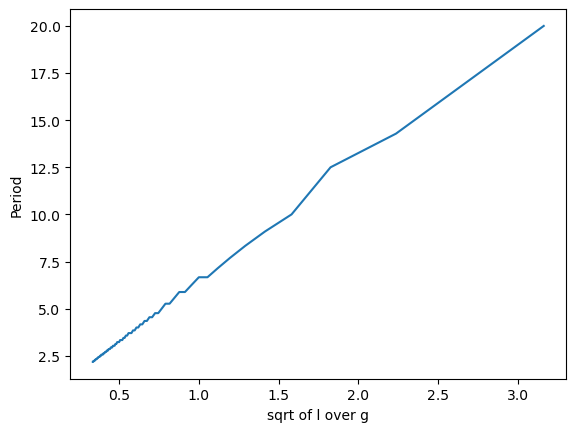

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.fft import fft, fftfreq
from scipy import stats as st
import math
from astropy import constants as const
import pandas as pd
import scipy.linalg as lin
from statsmodels.tsa.seasonal import seasonal_decompose



# Constants
l = 10
g = 1
dtheta0 = 0
theta0 = math.pi/4
m = 1
period_list = []
sqrt_l_over_g = []

def func(t, status):
    
    theta, dtheta = status
    ddtheta = -g*math.sin(theta)/l
    
    return dtheta, ddtheta


#Define the range of values to solve over
#Initial time
ti = 0 
#Final time
tf = 100
# Duration
t_span = np.array([ti,tf])

#Define the range of values to be kept and output
NVals = 60*(tf-ti) #Number of values to sample when printing out at the end
tVals = np.linspace(ti,tf,NVals)


for i in range(1, 90, 1):
    global g
    g = i
    sqrt_l_over_g.append(math.sqrt(l/g))

    # The Df is 1, only theta and dtheta need to be set
    x0 = np.array([theta0, dtheta0])

    # Use integrate.solve_ivp to solve the equation
    result = integrate.solve_ivp(func,t_span,x0,method='RK45',t_eval=tVals, dense_output=True)
    result_y = result.y
    time_series = result.y[0]

    # 计算傅里叶变换
    N = len(time_series)
    T = 1.0/60  # 假设时间步长为1，可以根据实际情况调整
    yf = fft(time_series)
    xf = fftfreq(N, T)[:N//2]

    # 画出傅里叶变换结果
    # plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    # plt.grid()
    # plt.title('Frequency domain representation')
    # plt.xlabel('Frequency')
    # plt.ylabel('Amplitude')
    # plt.show()

    # 找到主要的频率
    peak_freq = xf[np.argmax(np.abs(yf[:N//2]))]
    period = 1.0 / peak_freq
    period_list.append(period)


# plt.axis([0, 90, 0, 9])
plt.plot(sqrt_l_over_g, period_list)

plt.xlabel("sqrt of l over g")
plt.ylabel("Period")
plt.show

